In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [77]:
data = pd.read_csv("Data/iris.csv")

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


El conjunto de datos Iris consta de 150 observaciones de tres especies diferentes de flores: setosa, versicolor y virginica. Cada especie está representada por 50 muestras. Para cada observación, se registran cuatro características diferentes:

Longitud del sépalo (en centímetros): La longitud del sépalo es la distancia desde la base de la flor hasta el punto en que el sépalo se une al tallo.

Ancho del sépalo (en centímetros): El ancho del sépalo es la distancia entre los lados del sépalo en su punto más ancho.

Longitud del pétalo (en centímetros): La longitud del pétalo es la distancia desde la base de la flor hasta el punto más alejado del pétalo.

Ancho del pétalo (en centímetros): El ancho del pétalo es la distancia entre los lados del pétalo en su punto más ancho.

In [32]:
data

,sepal.length,sepal.width,petal.length,petal.width,target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [33]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
target          0
dtype: int64

Vemos que no hay NaNs o Nulos

In [34]:
# Summary statistics
summary_stats = data.describe()
summary_stats

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
data.value_counts("target")

target
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

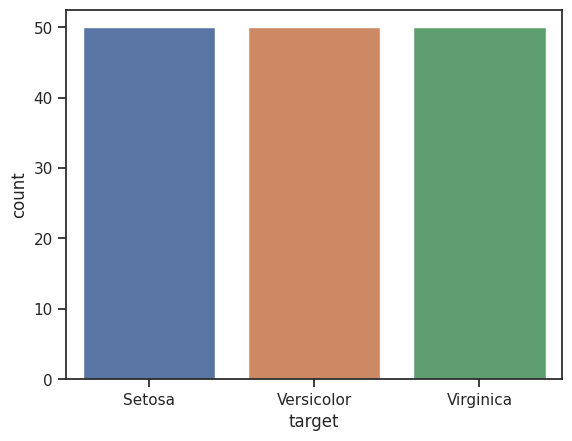

In [36]:
sns.countplot(x='target', data=data, )
plt.show()

Hay 3 clases (especies) y están balanceadas

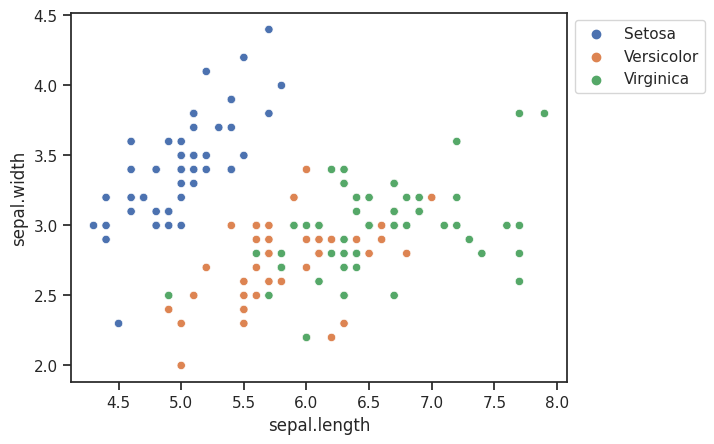

In [38]:
sns.scatterplot(x='sepal.length', y='sepal.width',
                hue='target', data=data, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

La especie Setosa tiene longitudes de sépalo más pequeñas pero anchos de sépalo más grandes.
La especie Versicolor se encuentra en el medio de las otras dos especies en cuanto a longitud y ancho del sépalo.
La especie Virginica tiene longitudes de sépalo más grandes pero anchos de sépalo más pequeños.

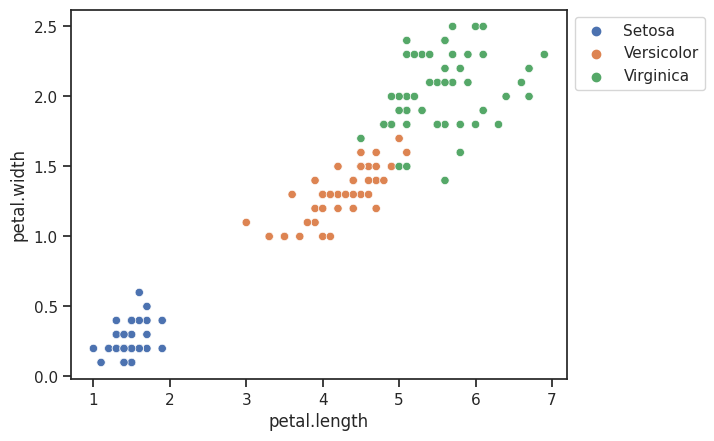

In [42]:
sns.scatterplot(x='petal.length', y='petal.width',
                hue='target', data=data, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


La especie Setosa tiene longitudes y anchos de pétalos más pequeños.
La especie Versicolor se encuentra en el medio de las otras dos especies en cuanto a longitud y ancho de pétalos.
La especie Virginica tiene las longitudes y anchos de pétalos más grandes.







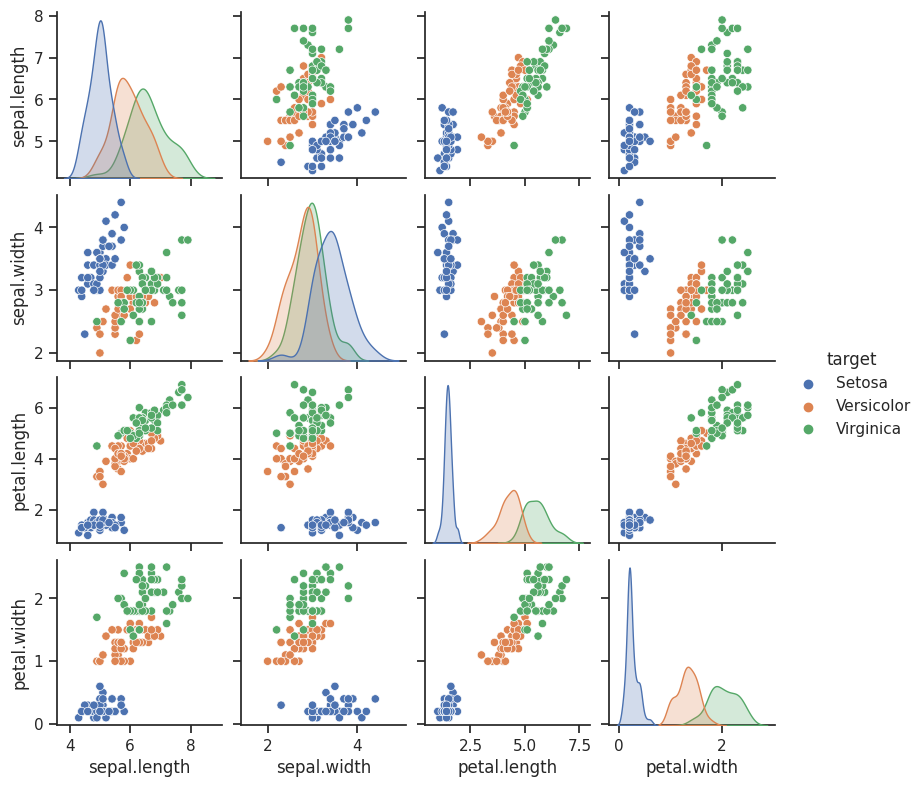

In [45]:
sns.pairplot(data,hue='target', height=2)
plt.show()

Podemos observar varios tipos de relaciones en este gráfico, como que la especie Setosa tiene los pétalos más estrechos y cortos. También tiene la longitud de sépalo más pequeña pero anchos de sépalo más grandes.

Alta correlación entre las columnas de longitud y ancho del pétalo.
Setosa tiene tanto baja longitud del pétalo como ancho del pétalo.
Versicolor tiene tanto longitud del pétalo como ancho del pétalo promedio.
Virginica tiene tanto alta longitud del pétalo como ancho del pétalo.
El ancho del sépalo para Setosa es alto y la longitud es baja.
Versicolor tiene valores promedio para las dimensiones del sépalo.
Virginica tiene un ancho del sépalo pequeño pero una longitud del sépalo grande.

Existe una cantidad significativa de superposición entre las especies en cuanto a la longitud del sépalo, por lo que no es una característica de clasificación efectiva.

Hay aún más superposición entre las especies en cuanto al ancho del sépalo, por lo que tampoco es una característica de clasificación efectiva.

La longitud del pétalo es una buena característica de clasificación, ya que separa claramente las especies. La superposición es extremadamente baja (entre Versicolor y Virginica), y Setosa está bien separada de las otras dos.

El ancho del pétalo es una buena característica de clasificación. La superposición es significativamente baja (entre Versicolor y Virginica), y Setosa está bien separada de las otras dos.

In [49]:
# Correlation matrix
correlation_matrix = data.corr()
correlation_matrix

<ipython-input-49-5c65e28da85c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<ipython-input-76-716bbd3180b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), annot = True);


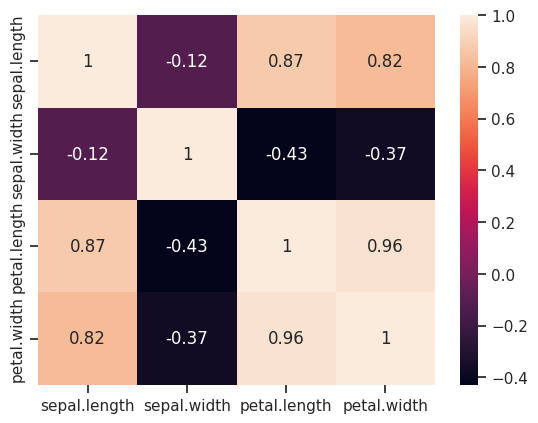

In [76]:
sns.heatmap(data.corr(method='pearson'), annot = True);

plt.show()

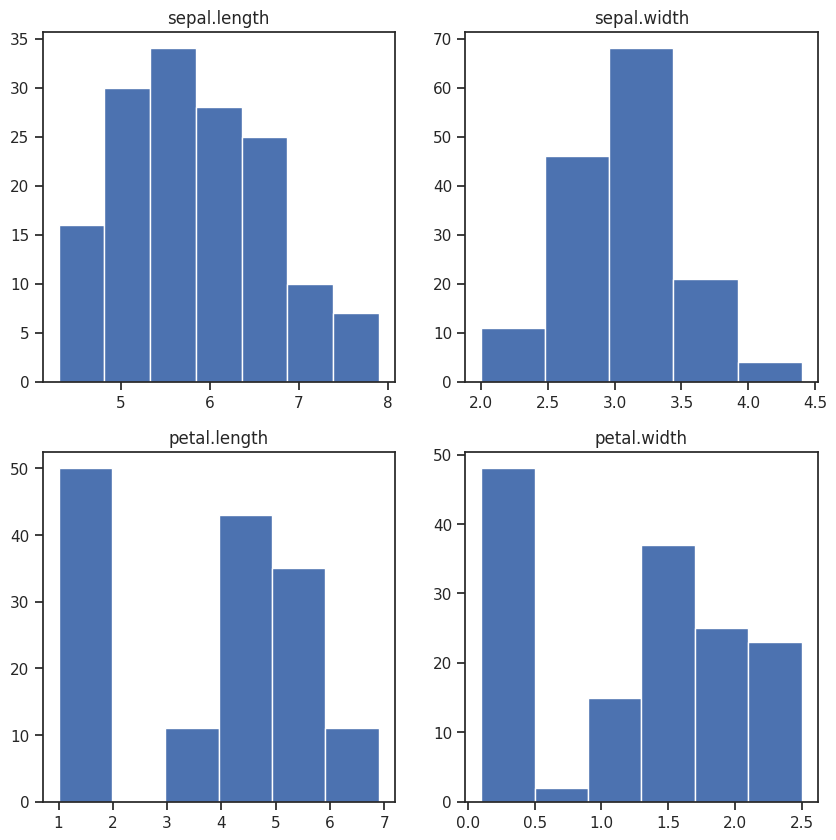

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("sepal.length")
axes[0,0].hist(data['sepal.length'], bins=7)

axes[0,1].set_title("sepal.width")
axes[0,1].hist(data['sepal.width'], bins=5);

axes[1,0].set_title("petal.length")
axes[1,0].hist(data['petal.length'], bins=6);

axes[1,1].set_title("petal.width")
axes[1,1].hist(data['petal.width'], bins=6);


A partir del gráfico anterior, podemos ver que:

La frecuencia más alta de la longitud del sépalo se encuentra entre 30 y 35, lo que equivale a entre 5.5 y 6.
La frecuencia más alta del ancho del sépalo se sitúa alrededor de 70, que está entre 3.0 y 3.5.
La frecuencia más alta de la longitud del pétalo es alrededor de 50, que se encuentra entre 1 y 2.
La frecuencia más alta del ancho del pétalo se sitúa entre 40 y 50, que está entre 0.0 y 0.5.

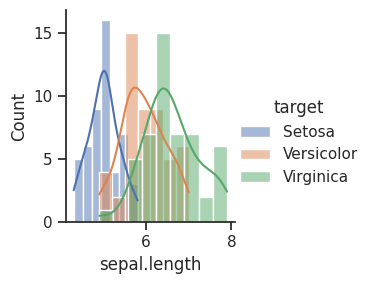

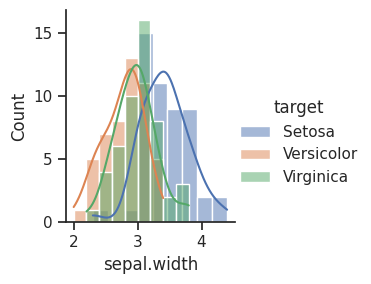

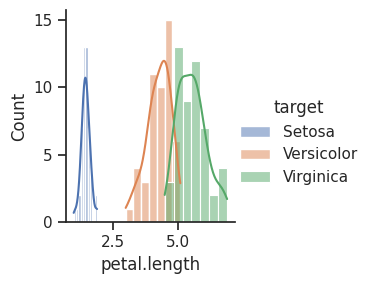

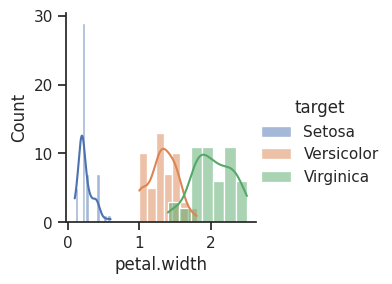

In [54]:
plot = sns.FacetGrid(data, hue="target")
plot.map(sns.histplot, "sepal.length", kde=True).add_legend()


plot = sns.FacetGrid(data, hue="target")
plot.map(sns.histplot, "sepal.width", kde=True).add_legend()

plot = sns.FacetGrid(data, hue="target")
plot.map(sns.histplot, "petal.length", kde=True).add_legend()

plot = sns.FacetGrid(data, hue="target")
plot.map(sns.histplot, "petal.width", kde=True).add_legend()


plt.show()

A partir de los gráficos anteriores, podemos ver que:

En el caso de la Longitud del Sépalo, existe una gran cantidad de superposición.
En el caso del Ancho del Sépalo también, existe una gran cantidad de superposición.
En el caso de la Longitud del Pétalo, hay muy poca superposición.
En el caso del Ancho del Pétalo también, hay muy poca superposición.

In [55]:

# Perform ANOVA to test for differences in means between species
# First, separate the data by species
setosa = data[data['target'] == 0]['sepal.length']
versicolor = data[data['target'] == 1]['sepal.length']
virginica = data[data['target'] == 2]['sepal.length']


In [56]:

# Perform one-way ANOVA
anova_result = stats.f_oneway(setosa, versicolor, virginica)
print("\nANOVA Result:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)



ANOVA Result:
F-statistic: nan
P-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


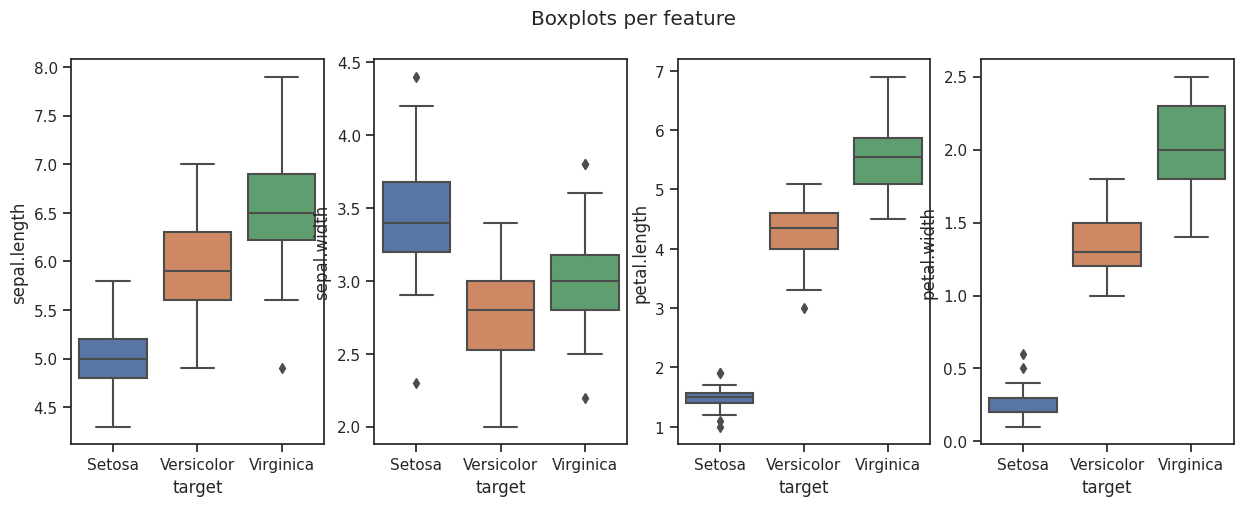

In [83]:

fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=False)
fig.suptitle('Boxplots per feature')

sns.boxplot(ax=axes[0],x="target", y="sepal.length", data=data)
sns.boxplot(ax=axes[1],x="target", y="sepal.width", data=data)
sns.boxplot(ax=axes[2],x="target", y="petal.length", data=data)
sns.boxplot(ax=axes[3],x="target", y="petal.width", data=data)
plt.show()

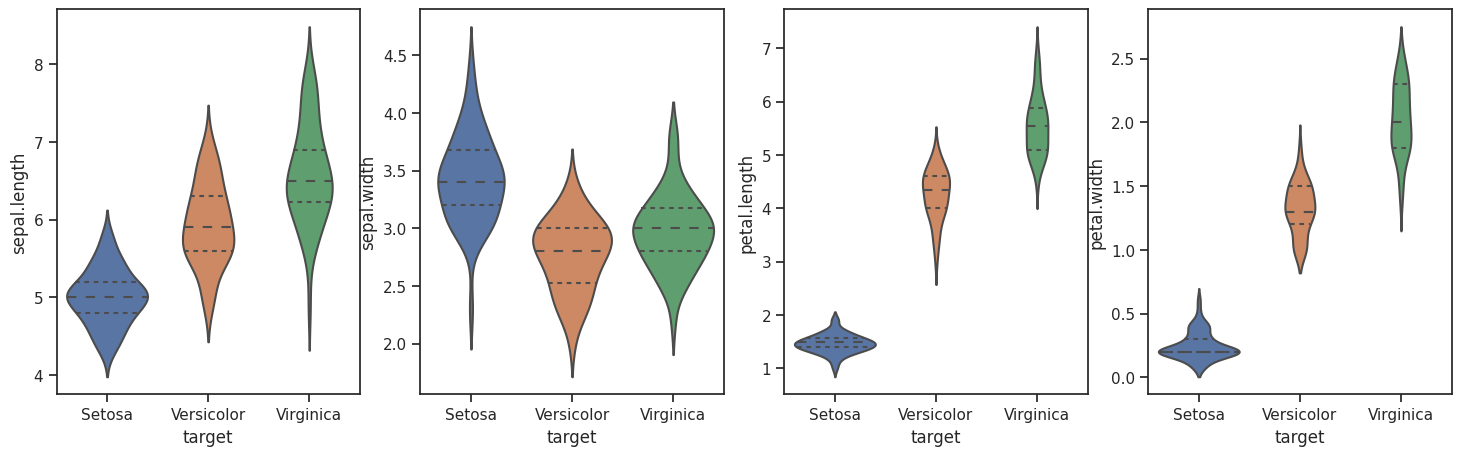

In [94]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
sns.violinplot( y="sepal.length", x= "target", data=data, orient='v' , ax=axes[0],inner='quartile')
sns.violinplot( y="sepal.width", x= "target", data=data, orient='v' , ax=axes[1],inner='quartile')
sns.violinplot( y="petal.length", x= "target", data=data, orient='v' , ax=axes[2],inner='quartile')
sns.violinplot(y="petal.width", x= "target", data=data, orient='v' , ax=axes[3],inner='quartile')

plt.show()

 Se muestran los valores medios/medianos en cada gráfico para varias características (longitud y ancho del sépalo, longitud y ancho del pétalo).

Los valores de alta densidad representan los valores medios/medianos, por ejemplo: Iris Setosa tiene la mayor densidad en 5.0 cm (característica de longitud del sépalo), que también es el valor mediano (5.0) según la tabla.

Setosa tiene una menor distribución y densidad en cuanto a la longitud y el ancho del pétalo (tiene las características más pequeñas y menos dispersas, con algunos valores atípicos.).


La especie Versicolor está distribuida de manera promedio y tiene características promedio en cuanto a la longitud y el ancho del pétalo.



Virginica está altamente distribuida con una gran cantidad de valores y características en cuanto a la longitud y el ancho del sépalo..
